First 5 rows of the Wine dataset:
+---+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+--------+
|   | alcohol | malic_acid | ash  | alcalinity_of_ash | magnesium | total_phenols | flavanoids | nonflavanoid_phenols | proanthocyanins | color_intensity | hue  | od280/od315_of_diluted_wines | proline | target |
+---+---------+------------+------+-------------------+-----------+---------------+------------+----------------------+-----------------+-----------------+------+------------------------------+---------+--------+
| 0 |  14.23  |    1.71    | 2.43 |       15.6        |   127.0   |      2.8      |    3.06    |         0.28         |      2.29       |      5.64       | 1.04 |             3.92             | 1065.0  |  0.0   |
| 1 |  13.2   |    1.78    | 2.14 |       11.2        |   100.0   |     2.65      |    2.76    |         0.26     

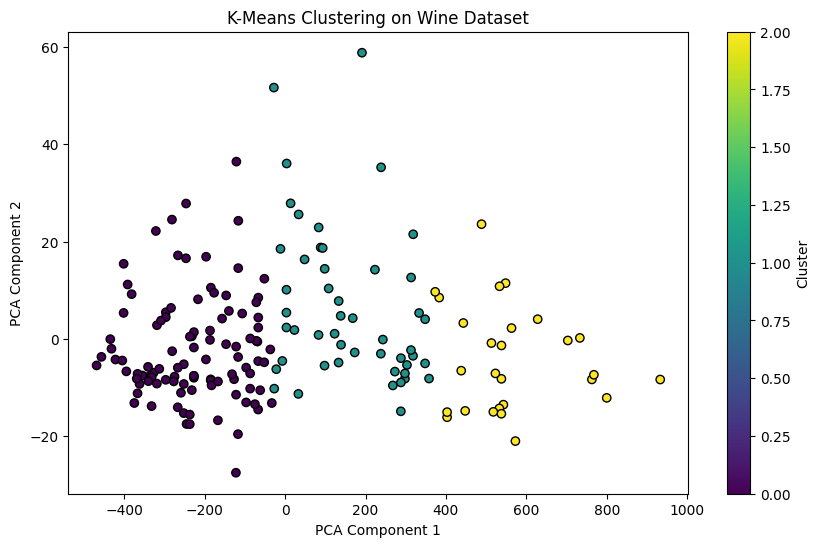

In [15]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tabulate import tabulate

# 1. Loading the Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target

# Creating a DataFrame to easily inspect the dataset
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Displaying the first few rows of the dataset in a formatted way
print("First 5 rows of the Wine dataset:")
print(tabulate(df.head(), headers='keys', tablefmt='pretty'))

# Checking unique classes in the target
print("\nUnique classes in the target (wine types):", np.unique(y))
print("Number of unique classes:", len(np.unique(y)))

# Displaying a summary of the dataset
print("\nDataset shape:", X.shape)
print("Feature names:", wine.feature_names)

# 2. Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # We choose 3 clusters since there are 3 wine types in the dataset
clusters = kmeans.fit_predict(X)

# 3. Reducing Dimensionality for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 4. Visualizing the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering on Wine Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
